In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Generate synthetic data with noise
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(80)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [12]:
# Define a more complex Glow regression model
class GlowRegression(nn.Module):
    def __init__(self):
        super(GlowRegression, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [13]:
# Instantiate the model
model = GlowRegression()

In [15]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# Training loop
num_epochs = 1000
train_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.0098
Epoch [200/1000], Loss: 0.0083
Epoch [300/1000], Loss: 0.0079
Epoch [400/1000], Loss: 0.0075
Epoch [500/1000], Loss: 0.0074
Epoch [600/1000], Loss: 0.0073
Epoch [700/1000], Loss: 0.0072
Epoch [800/1000], Loss: 0.0071
Epoch [900/1000], Loss: 0.0071
Epoch [1000/1000], Loss: 0.0070


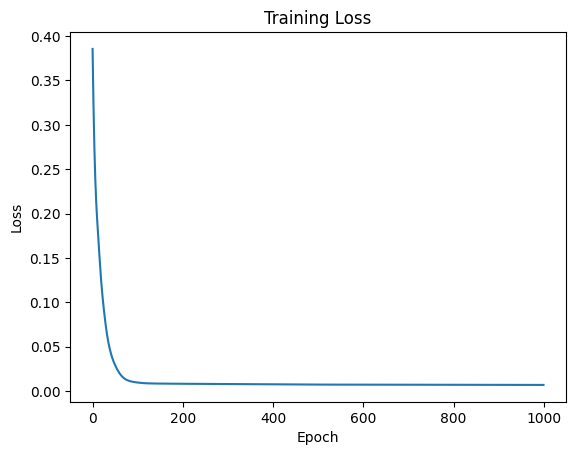

In [17]:
# Plot the training loss
plt.plot(range(num_epochs), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [18]:
# Put the model in evaluation mode
model.eval()

GlowRegression(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [19]:
# Make predictions on the test data
with torch.no_grad():
    y_pred = model(X_test)

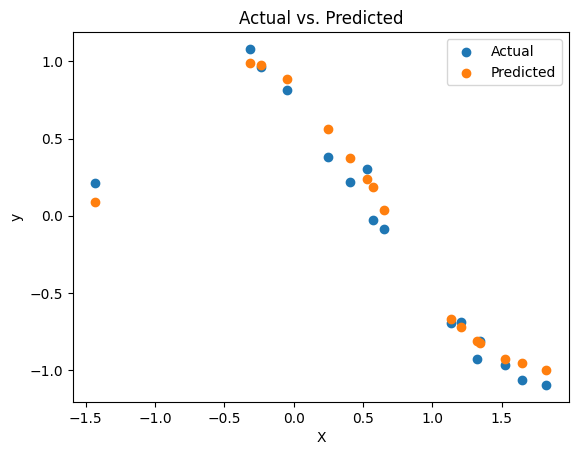

In [20]:
# Plot the actual vs  predicted values
plt.scatter(X_test.numpy(), y_test.numpy(), label='Actual')
plt.scatter(X_test.numpy(), y_pred.numpy(), label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Actual vs. Predicted')
plt.show()